# Лабораторная работа №3
### Реализация алгоритмов хэширования





### Для выполнения заданий использовать библиотеку **hashlib** в Python и материалы ЛР 2

Библиотека hashlib предоставляет интерфейс для различных криптографических хеш-функций в Python. Хеш-функции преобразуют произвольные данные в фиксированную строку байтов (хеш), которая обычно используется для проверки целостности данных, хранения паролей и цифровых подписей.



### Задание 1. Проведите сравнительный анализ указанных хэш-функций по ключевому параметру: производительность (среднее время вычислений).
1. Сгенерируйте случайный набор данных (или прочитайте файл) разного размера (например, 1 КБ, 1 МБ, 10 МБ).
2. Для каждого размера данных измерьте время вычисления хэша для всех указанных функциях.
3. Протестируйте замер времени вычисления хэша 10 раз. Выведите полученные значения для каждой функции. Результаты представьте в виде 5 вспомогательных таблиц для каждой хэш-функции (размер данных – время в секундах).
4. Вычислите среднее время расчета хэша для каждой функции. Заполните таблицу 1.
5. Постройте график изменения времени расчета хэша для самой "быстрой" функции.
6. Приведите листинг когда и скриншоты результатов работы программы.
7. Сделайте выводы:
* Какая функция показала наивысшую производительность?
* Как производительность зависит от размера входных данных?

Объясните возможные причины различий.
<br>*для реализации таблиц и графиков(используйте библиотеки pandas и matplotlib)


MD5: size=1.0 KB, avg_time=0.000005 sec
SHA1: size=1.0 KB, avg_time=0.000009 sec
SHA256: size=1.0 KB, avg_time=0.000008 sec
SHA512: size=1.0 KB, avg_time=0.000008 sec
BLAKE2b: size=1.0 KB, avg_time=0.000006 sec
MD5: size=1024.0 KB, avg_time=0.002088 sec
SHA1: size=1024.0 KB, avg_time=0.002505 sec
SHA256: size=1024.0 KB, avg_time=0.005283 sec
SHA512: size=1024.0 KB, avg_time=0.003730 sec
BLAKE2b: size=1024.0 KB, avg_time=0.003287 sec
MD5: size=10240.0 KB, avg_time=0.021511 sec
SHA1: size=10240.0 KB, avg_time=0.024232 sec
SHA256: size=10240.0 KB, avg_time=0.042681 sec
SHA512: size=10240.0 KB, avg_time=0.021480 sec
BLAKE2b: size=10240.0 KB, avg_time=0.023823 sec

=== MD5 ===
    Размер данных (байт)  Среднее время (сек)
0                  1024             0.000005
1               1048576             0.002088
2              10485760             0.021511

=== SHA1 ===
    Размер данных (байт)  Среднее время (сек)
0                  1024             0.000009
1               1048576          

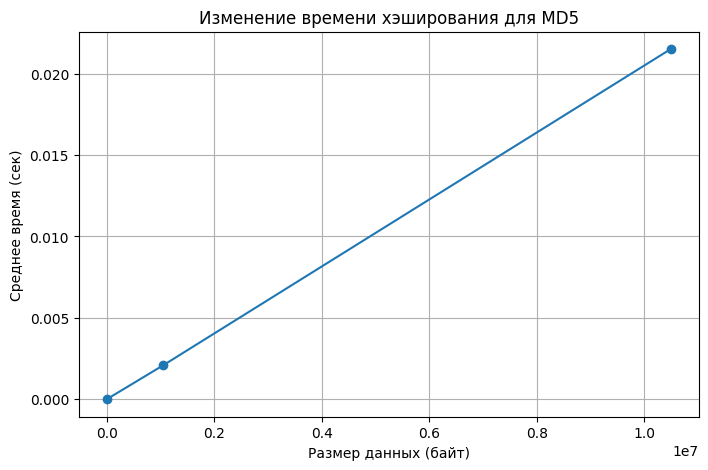

In [ ]:
import hashlib
import os
import time
import pandas as pd
import matplotlib.pyplot as plt


SIZES = [1024, 1024 * 1024, 10 * 1024 * 1024]  # 1KB, 1MB, 10MB
HASH_FUNCTIONS = {
    "MD5": hashlib.md5,
    "SHA1": hashlib.sha1,
    "SHA256": hashlib.sha256,
    "SHA512": hashlib.sha512,
    "BLAKE2b": hashlib.blake2b
}
ITERATIONS = 10

# Генерация данных и замеры времени
# your code here


# Таблицы результатов
# your code here
df_list = []


# График для самой быстрой функции
# your code here
# avg_speeds =
# fastest =
# fastest_df =
plt.title(f"Изменение времени хэширования для {fastest}")
plt.xlabel("Размер данных (байт)")
plt.ylabel("Среднее время (сек)")
plt.grid(True)
plt.show()


###Поиск коллизий (упрощенная модель). Что такое коллизия?
Должно быть вычислительно невозможно найти любую пару различных сообщений (M1, M2), таких что H(M1) = H(M2).
<br>Задача криптографии – сделать поиск таких
пар практически невыполнимым за разумное время.
<br>Значение: Это свойство критически важно для
безопасности алгоритмов электронной подписи. Подробнее описано в материалах лекций.

<br>Ниже приведен пример поиска коллизии. Для наглядности используется простая функция (сумму байтов), а не криптографический хэш.


In [ ]:

def simple_hash(data):
    """Простая имитация хэш-функции."""
    return sum(data) % 256

msg1 = b"ABC"
msg2 = b"CBA"

print("simple_hash(ABC) =", simple_hash(msg1))
print("simple_hash(CBA) =", simple_hash(msg2))

if simple_hash(msg1) == simple_hash(msg2):
    print("Коллизия найдена — разные сообщения дали одинаковый 'хэш'!")
else:
    print("Нет коллизии.")


simple_hash(ABC) = 198
simple_hash(CBA) = 198
Коллизия найдена — разные сообщения дали одинаковый 'хэш'!


###Задание 2: Поиск коллизий для усечённых хэшей

Это задание демонстрирует сложность поиска коллизий на практике.
Напишите функцию, которая:

1.   Генерирует случайные исходные сообщения.
2.   Для урезанных версий хэш-функций (например, берется только первые n бит хэша, где n = 16, 20, 24...) пытается найти коллизию — два разных сообщения с одинаковым урезанным хэшем.
3.   Фиксирует количество попыток, потребовавшихся для нахождения первой коллизии для каждой битовой длины n.



Коллизия найдена для 16 бит за 178 попыток
Коллизия найдена для 20 бит за 379 попыток
Коллизия найдена для 24 бит за 4960 попыток
Коллизия найдена для 28 бит за 2127 попыток
Коллизия найдена для 32 бит за 101034 попыток


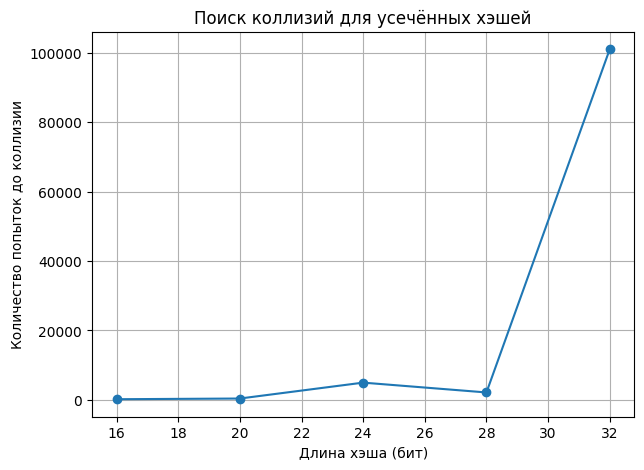

In [ ]:
import hashlib
import os
import math
import matplotlib.pyplot as plt

def truncated_hash(data, n_bits, hash_func=hashlib.sha256):
    # your code here

def find_collision(n_bits, hash_func=hashlib.sha256, max_attempts=1_000_000):
    # your code here

# Поиск коллизий
bit_lengths = [16, 20, 24, 28, 32]
results = []

for n in bit_lengths:
    attempts, msg1, msg2, h = find_collision(n)
    results.append((n, attempts))
    print(f"Коллизия найдена для {n} бит за {attempts} попыток")

# Визуализация
# your code here

plt.title("Поиск коллизий для усечённых хэшей")
plt.xlabel("Длина хэша (бит)")
plt.ylabel("Количество попыток до коллизии")
plt.grid(True)
plt.show()
